In [34]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from algbench import read_as_pandas, Benchmark
import re
from collections import defaultdict

font = {'family': 'serif', 'size': 11}
matplotlib.rc('font', **font)

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['figure.figsize'] = [4.5, 3.5]

sns.set_theme()

result_paths = ['results/exclusive/classical_benchmark/small', 'results/exclusive/classical_benchmark/large']

In [78]:
best_bounds = defaultdict(lambda: np.inf)
best_solution = defaultdict(int)
instance_solved = defaultdict(int)
total_instances = 0

for path in result_paths:
    for row in Benchmark(path):
        instance_name = row['parameters']['args']['instance']['name']
        instance_solved[instance_name] += 1
        best_solution[instance_name] = max(round(row['result']['objective_value']), best_solution[instance_name])
        
        if "best_bound" not in row['result']:
            continue

        best_bounds[instance_name] = min(round(row['result']['best_bound']), best_bounds[instance_name])

        if row['parameters']['args']['solver'] == "combo":
            assert row['result']['best_bound'] == row['result'][
                'objective_value'], f"{row['result']['best_bound']} != {row['result']['objective_value']}"

    total_instances += len(Benchmark(path))
    
    for row in Benchmark(path):
        instance_name = row['parameters']['args']['instance']['name']
        items = row['parameters']['args']['instance']['items']    
        obj_val = sum(items[i]["profit"] for i, x in enumerate(row['result']['item_assignments']) if x == True)
            
        #if round(row['result']['objective_value']) != obj_val:
        #    print(f"{round(row['result']['objective_value'])} != {obj_val} {row['parameters']['args']['solver']} {instance_name}")
        if round(row['result']['objective_value']) > best_bounds[instance_name]:
            print(f"{row['result']['objective_value']} > {best_bounds[instance_name]} for {obj_val} {row['parameters']['args']['solver']} {instance_name}")

removed_instances = [instance for instance, count in instance_solved.items() if count != 4]

for instance in removed_instances:
    if instance in best_bounds: del best_bounds[instance]
    del best_solution[instance]
    del instance_solved[instance]

print(f"Instances not solved 4 times", [(instance, count) for instance, count in instance_solved.items() if count != 4])
print(f"Total instances: {total_instances}")
print(f"Instances solved by all algorithms: {len(best_bounds)}")

assert all([best_solution[instance] == best_bounds[instance] for instance in
            best_bounds]), f"Best solution is not equal to best bound for some instances {[(instance, best_solution[instance], best_bounds[instance]) for instance in best_bounds if best_solution[instance] != best_bounds[instance]]}"

assert len(
    best_bounds) == total_instances / 4, f"Not all instances were solved by all algorithms or some instances were solved multiple times"

9376538973.07476 > 9376528144 for 10626628397 ip n_550_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap
9376541022.85333 > 9376527533 for 11876627827 ip n_500_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap
9376551541.633621 > 9376541069 for 10626741400 ip n_800_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap
7500354644.811775 > 7500330210 for 10000430281 ip n_650_c_10000000000_g_2_f_0.3_eps_1e-05_s_300.knap
9376616163.15153 > 9376600254 for 11251900939 ip n_2050_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap
9376625850.303238 > 9376611628 for 11251912282 ip n_2350_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap
10000071118.0 > 10000049892 for 10000071118 cp-sat n_2650_c_10000000000_g_10_f_0.3_eps_1e-05_s_300.knap
9376601220.171272 > 9376588360 for 12502089405 ip n_1850_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap
9376637003.73238 > 9376624541 for 11877025520 ip n_2650_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap
9376576133.45123 > 9376561174 for 11251861816 ip n_1250_c_10000000000_g_4_f_0.3_eps_1e-0

AssertionError: Best solution is not equal to best bound for some instances [('n_550_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376538973, 9376528144), ('n_500_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376541023, 9376527533), ('n_800_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376551542, 9376541069), ('n_650_c_10000000000_g_2_f_0.3_eps_1e-05_s_300.knap', 7500354645, 7500330210), ('n_2050_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376616163, 9376600254), ('n_2350_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376625850, 9376611628), ('n_2650_c_10000000000_g_10_f_0.3_eps_1e-05_s_300.knap', 10000071118, 10000049892), ('n_1850_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376601220, 9376588360), ('n_2650_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376637004, 9376624541), ('n_1250_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376576133, 9376561174), ('n_1400_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376579080, 9376566983), ('n_1600_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376583496, 9376572980), ('n_2100_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376613975, 9376599411), ('n_2700_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376636047, 9376625155), ('n_2300_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376619960, 9376606660), ('n_1900_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376601444, 9376588875), ('n_1550_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376586448, 9376573403), ('n_1000_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376562868, 9376549545), ('n_1300_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376578662, 9376566658), ('n_1750_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376595117, 9376580886), ('n_1500_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376584356, 9376573607), ('n_1150_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376566626, 9376556569), ('n_2450_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376627137, 9376612227), ('n_2550_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376627930, 9376618027), ('n_2200_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376614965, 9376605521), ('n_1700_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376591588, 9376582125), ('n_2700_c_10000000000_g_10_f_0.3_eps_1e-05_s_300.knap', 10000072488, 10000052493), ('n_2750_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376642645, 9376629197), ('n_1800_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376599292, 9376586349), ('n_2250_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376625420, 9376613672), ('n_2600_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376634877, 9376620870), ('n_2000_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376605634, 9376592598), ('n_2750_c_10000000000_g_10_f_0.3_eps_1e-05_s_300.knap', 10000060404, 10000050303), ('n_1450_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376583061, 9376571387), ('n_1950_c_10000000000_g_4_f_0.3_eps_1e-05_s_300.knap', 9376606677, 9376594887)]

In [41]:
def parse_row(row):
    return {
        'algorithm': row['parameters']['args']['solver'],
        'size': row['parameters']['args']['instance']['size'],
        'elapsed_real_time': (row['result']['elapsed_real_time']),
        'instance': row['parameters']['args']['instance']['name'],
        'gap': np.abs(
            best_bounds[row['parameters']['args']['instance']['name']] - row['result']['objective_value']) / np.abs(
            row['result']['objective_value']),
        'objective_value': row['result']['objective_value'],
        'optimal': best_bounds[row['parameters']['args']['instance']['name']] == row['result']['objective_value']
    }


results = pd.concat([read_as_pandas(path, lambda row: {

}) for path in result_paths])

<Axes: xlabel='size', ylabel='gap'>

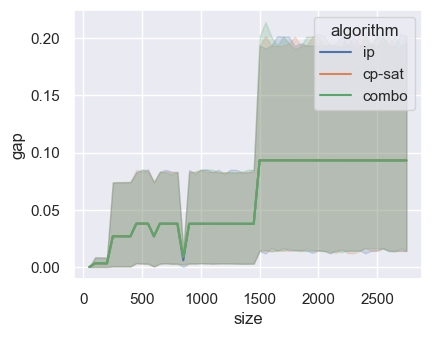

In [45]:
fig, ax = plt.subplots()
sns.lineplot(data=results[results["algorithm"] != "expknap"], x='size', y='gap', hue='algorithm', ax=ax)

<Axes: xlabel='size', ylabel='optimal'>

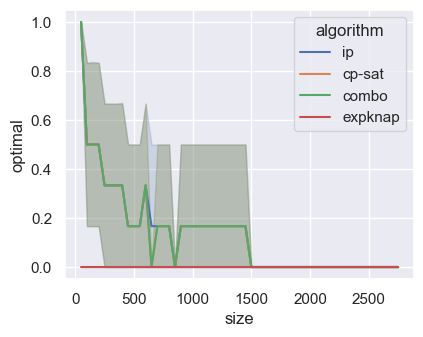

In [44]:
fig, ax = plt.subplots()
sns.lineplot(data=results, x='size', y='optimal', hue='algorithm', ax=ax)